<a href="https://colab.research.google.com/github/Ironsoldier353/Cluster_customers/blob/main/Cluster_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np


Load the dataset

In [14]:
data = pd.read_csv('Mall_Customers.csv')

In [16]:
# Feature Engineering
data['Income x Spending'] = data['Annual Income (k$)'] * data['Spending Score (1-100)']
features = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Income x Spending']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Elbow Method for optimal number of clusters

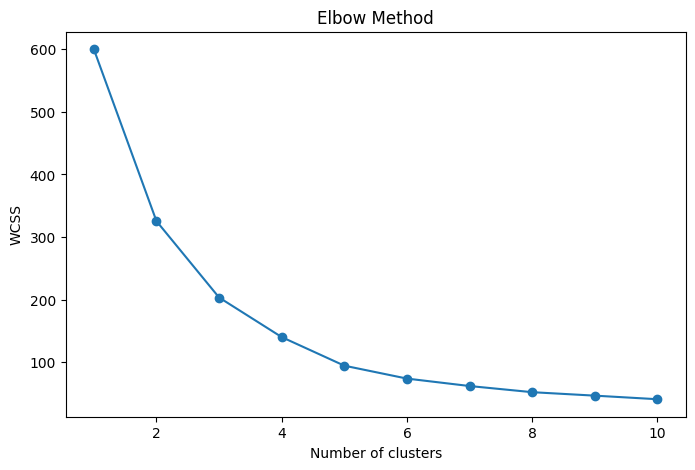

In [17]:
# Elbow Method to determine optimal k
def elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

elbow_method(scaled_features)

K-Means clustering

In [18]:
# Apply K-means with optimal number of clusters (choose the best k from elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=20, random_state=0)  # Increased n_init
clusters_kmeans = kmeans.fit_predict(scaled_features)
data['Cluster_KMeans'] = clusters_kmeans

Evaluate

In [20]:
silhouette_avg_kmeans = silhouette_score(scaled_features, clusters_kmeans)
davies_bouldin_avg_kmeans = davies_bouldin_score(scaled_features, clusters_kmeans)

print(f'Silhouette Score (K-means): {silhouette_avg_kmeans:.2f}')
print(f'Davies-Bouldin Index (K-means): {davies_bouldin_avg_kmeans:.2f}')


Silhouette Score (K-means): 0.55
Davies-Bouldin Index (K-means): 0.58


Visualize

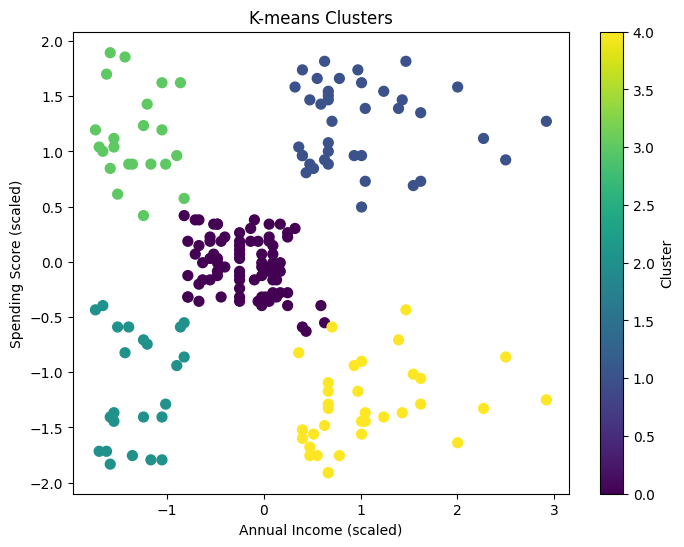

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters_kmeans, cmap='viridis', s=50)
plt.title('K-means Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
data.to_csv('clustered_customers.csv', index=False)